## Measuring CPU temps

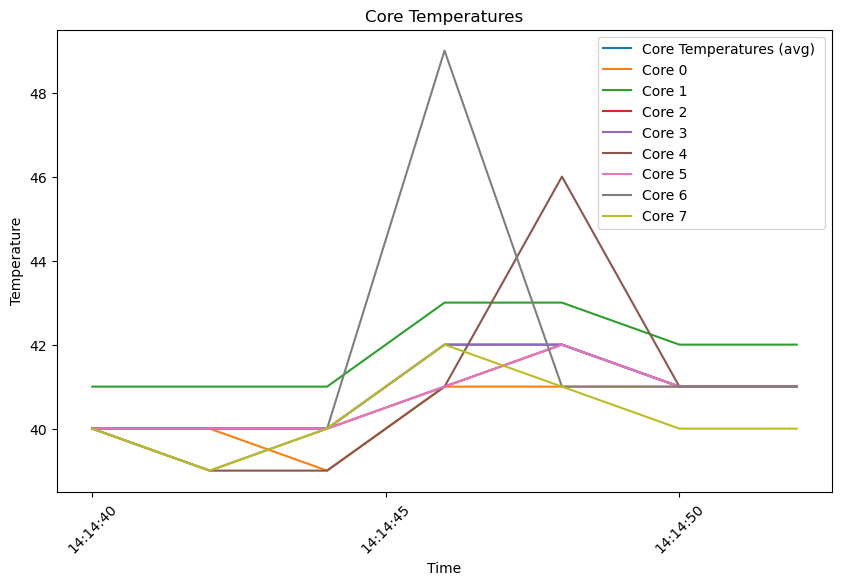

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("D:\Main\My Practice and experiments\My Practice LAB\Data_Hub\File Uploads\Claude.csv")

# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot line charts for each column from Column C to Column K
for col in data.columns[2:]:
    ax.plot(data['Time'], data[col], label=col)

# Set the title and labels
ax.set_title('Core Temperatures')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend
ax.legend()

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


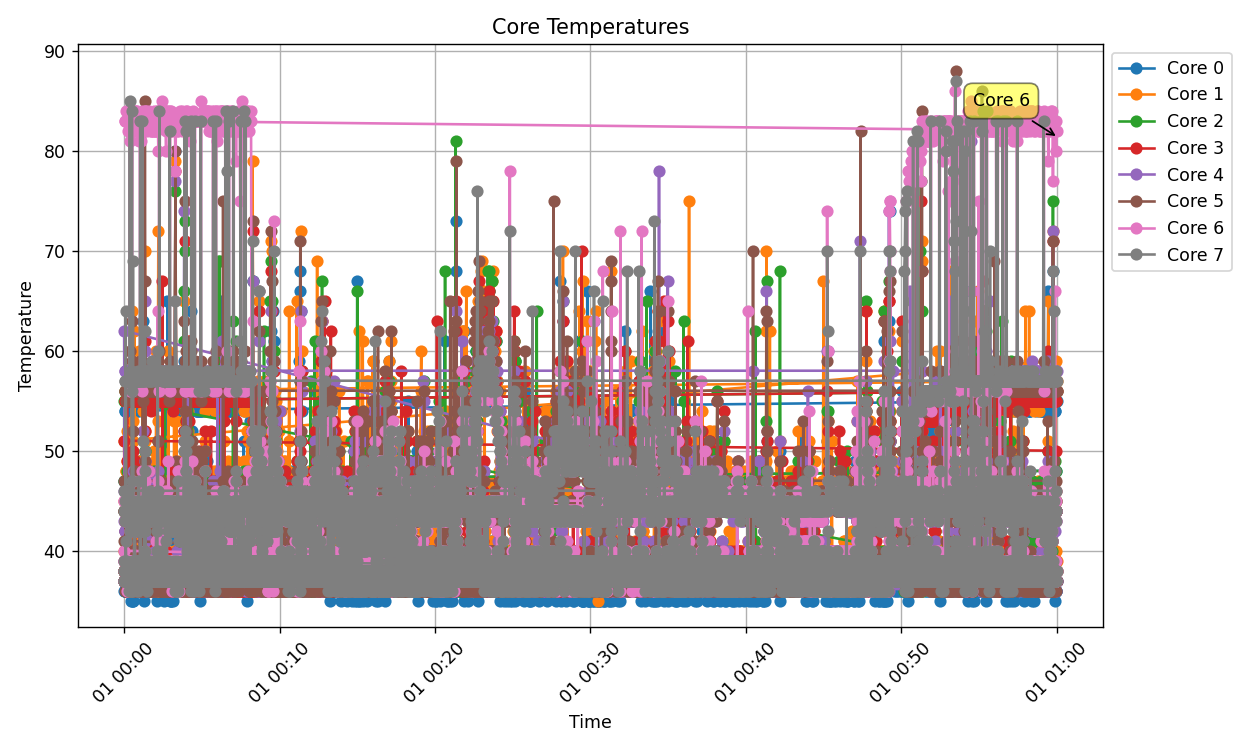

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('nbagg')
%matplotlib nbagg
import mplcursors  # Import mplcursors for hover functionality

"""
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
%matplotlib nbagg

"""
# Read the CSV file
data = pd.read_csv(r'C:\Users\Abhik\Downloads\Installers_Sep-23\hwi_800\Fourth_May_24.csv')

# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot line charts for each column from Column C to Column K with markers
for col in data.columns[2:]:
    ax.plot(data['Time'], data[col], label=col, marker='o')

# Set the title and labels
ax.set_title('Core Temperatures')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add grid lines
ax.grid(True)

# Use mplcursors to add hover functionality
mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label()))

# Adjust legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [3]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Abhik\Downloads\Installers_Sep-23\hwi_800\Fourth_May_24.csv')

In [4]:
data

,Time,Core Temperatures,Core 0,Core 1,Core 2,Core 3,Core 4,Core 5,Core 6,Core 7
0,00:03:55,46,45,46,47,46,45,46,46,45
1,00:03:57,46,46,48,46,47,46,46,45,45
2,00:03:59,50,47,57,48,51,48,49,48,48
3,00:04:01,48,48,49,47,48,47,47,47,47
4,00:04:03,46,46,46,45,45,46,46,46,45
...,...,...,...,...,...,...,...,...,...,...
16838,00:25:05,41,42,42,41,41,40,41,41,40
16839,00:25:07,43,43,44,44,43,43,44,43,42
16840,00:25:09,41,40,43,40,42,40,44,41,40
16841,00:25:11,42,41,43,42,41,41,42,41,41


In [5]:
# Define a custom date parser function to adjust the hour component dynamically
def custom_parser(x, target_hour):
    hour, minute = x.hour, x.minute  # Extract hour and minute directly from datetime object
    return x.replace(hour=target_hour, minute=minute)

# Rewrite the target_hours adjustment as a loop from 0 to 24
target_hours = {}
for hour in range(23):
    target_hours[hour] = (hour + 1) if hour != 0 else 23  # Adjusting to 24-hour format

# Convert 'Time' column to datetime objects
data['Time'] = pd.to_datetime(data['Time'])

# Apply the custom parser function to adjust the 'Time' column in the existing DataFrame
data['Time'] = data['Time'].apply(lambda x: custom_parser(x, target_hours[x.hour]))

# Separate date and time components and keep only the time component
data['Time'] = data['Time'].dt.time

# Now 'Time' column should reflect the correct hour dynamically adjusted to the desired target hours


C:\Users\Abhik\AppData\Local\Temp\ipykernel_28568\3023896347.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


In [6]:
#data['Time'] = data['Time'].dt.time
data.reset_index(inplace=True)
# data.to_csv('modified_data.csv', index=False)

In [ ]:
data['Time'] = data['Time'].dt.time
data

<IPython.core.display.Javascript object>


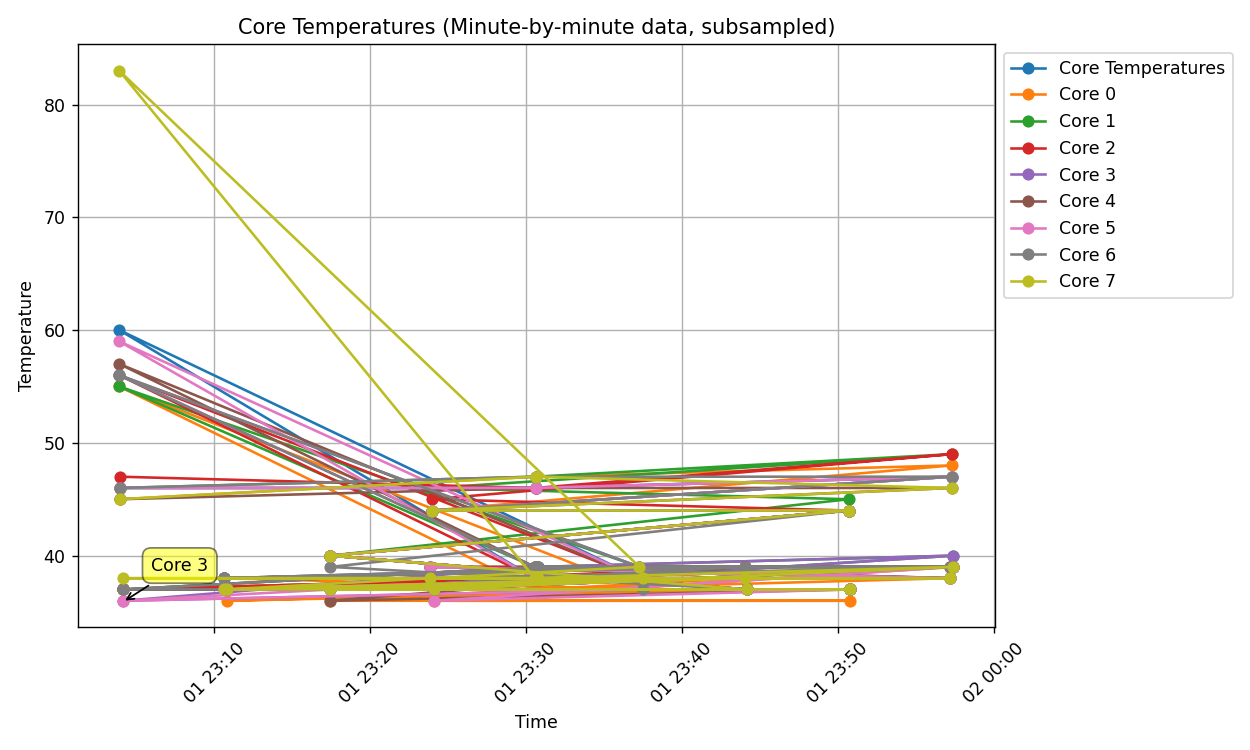

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplcursors  # Import mplcursors for hover functionality

# Ensure interactive plotting is enabled for Jupyter Notebook
matplotlib.use('nbagg')
%matplotlib nbagg

# Read the CSV file
# data = pd.read_csv(r'C:\Users\Abhik\Downloads\Installers_Sep-23\hwi_800\Fourth_May_24.csv')

# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')

# Set 'Time' column as the index
data.set_index('Time', inplace=True)

# Subsample data by selecting every nth row (adjust n as needed)
n = 800  # Subsample every 10th row
data_subsampled = data.iloc[::n, :]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot line charts for each column from Column C to Column K with markers
for col in data_subsampled.columns[1:]:
    ax.plot(data_subsampled.index, data_subsampled[col], label=col, marker='o')

# Set the title and labels
ax.set_title('Core Temperatures (Minute-by-minute data, subsampled)')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add grid lines
ax.grid(True)

# Use mplcursors to add hover functionality
mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label()))

# Adjust legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [10]:
data.head()

,index,Core Temperatures,Core 0,Core 1,Core 2,Core 3,Core 4,Core 5,Core 6,Core 7
Time,,,,,,,,,,
1900-01-01 23:03:55,0,46,45,46,47,46,45,46,46,45
1900-01-01 23:03:57,1,46,46,48,46,47,46,46,45,45
1900-01-01 23:03:59,2,50,47,57,48,51,48,49,48,48
1900-01-01 23:04:01,3,48,48,49,47,48,47,47,47,47
1900-01-01 23:04:03,4,46,46,46,45,45,46,46,46,45


In [13]:
print(data.columns)

Index(['index', 'Core Temperatures', 'Core 0', 'Core 1', 'Core 2', 'Core 3',
       'Core 4', 'Core 5', 'Core 6', 'Core 7'],
      dtype='object')


In [14]:
print(data.index)

DatetimeIndex(['1900-01-01 23:03:55', '1900-01-01 23:03:57',
               '1900-01-01 23:03:59', '1900-01-01 23:04:01',
               '1900-01-01 23:04:03', '1900-01-01 23:04:05',
               '1900-01-01 23:04:07', '1900-01-01 23:04:09',
               '1900-01-01 23:04:11', '1900-01-01 23:04:13',
               ...
               '1900-01-01 23:24:55', '1900-01-01 23:24:57',
               '1900-01-01 23:24:59', '1900-01-01 23:25:01',
               '1900-01-01 23:25:03', '1900-01-01 23:25:05',
               '1900-01-01 23:25:07', '1900-01-01 23:25:09',
               '1900-01-01 23:25:11', '1900-01-01 23:25:13'],
              dtype='datetime64[ns]', name='Time', length=16843, freq=None)


In [15]:
data = data.reset_index()
print(data.columns)  # Verify 'Time' is now a column

Index(['Time', 'index', 'Core Temperatures', 'Core 0', 'Core 1', 'Core 2',
       'Core 3', 'Core 4', 'Core 5', 'Core 6', 'Core 7'],
      dtype='object')


In [16]:
print(data.columns)

Index(['Time', 'index', 'Core Temperatures', 'Core 0', 'Core 1', 'Core 2',
       'Core 3', 'Core 4', 'Core 5', 'Core 6', 'Core 7'],
      dtype='object')


In [17]:
# Convert 'Time' to datetime and set it as the index
data['Time'] = pd.to_datetime(data['Time'])
data = data.set_index('Time')

In [18]:
# Create hour, minute, and second columns
data['hour'] = data.index.hour
data['minute'] = data.index.minute
data['second'] = data.index.second

# View the resulting DataFrame
print(data.head())

                     index  Core Temperatures  Core 0  Core 1  Core 2  Core 3  \
Time                                                                            
1900-01-01 23:03:55      0                 46      45      46      47      46   
1900-01-01 23:03:57      1                 46      46      48      46      47   
1900-01-01 23:03:59      2                 50      47      57      48      51   
1900-01-01 23:04:01      3                 48      48      49      47      48   
1900-01-01 23:04:03      4                 46      46      46      45      45   

                     Core 4  Core 5  Core 6  Core 7  hour  minute  second  
Time                                                                       
1900-01-01 23:03:55      45      46      46      45    23       3      55  
1900-01-01 23:03:57      46      46      45      45    23       3      57  
1900-01-01 23:03:59      48      49      48      48    23       3      59  
1900-01-01 23:04:01      47      47      47      47 